## 1. Introduction
In this project, we aim to predict the IMDb ratings of TV shows based on various features such as movie name, genre, year of release, and the number of votes. We will build a Machine Learning model that predicts IMDb ratings using historical data from the IMDb Top 250 dataset.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [34]:
# Load the dataset
df = pd.read_csv('/content/shows_imdb.csv')

# View the first few rows of the dataset
df.head()

,rank,show_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt5491994,Planet Earth II,2016,https://www.imdb.com/title/tt5491994,"145,597",9.5,TV-G,4h 58m,Documentary,...,"nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",nm2357454,Elizabeth White,David Attenborough returns with a new wildlife...,"ur0362356,ur33816519,ur64238818,ur69264448,ur2...","Wentloog,john-m-madsen,thespookybuz,pjdickinso...","rw3575992,rw3576144,rw3578121,rw3576211,rw3577...","At once awe-inspiring and terrifying!,Yet anot...",I have just finished watching the first episod...
1,2,tt0903747,Breaking Bad,2008,https://www.imdb.com/title/tt0903747,"1,881,190",9.5,TV-MA,49m,"Crime,Drama,Thriller",...,"nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...","nm0319213,nm0332467,nm2297407,nm1028558,nm0909...","Vince Gilligan,Peter Gould,George Mastras,Sam ...",A chemistry teacher diagnosed with inoperable ...,"ur128165243,ur6387867,ur158768880,ur20552756,u...","FiRE010,Supermanfan-13,Lukasmj,TheLittleSongbi...","rw7088846,rw7530139,rw8672131,rw3856786,rw8725...","Really Great,Damn near perfect!,A show you nee...",I have never watched a show that is as consist...
2,3,tt0795176,Planet Earth,2006,https://www.imdb.com/title/tt0795176,"210,164",9.4,TV-PG,8h 58m,Documentary,...,"nm0288144,nm1768412","Alastair Fothergill,Mark Linfield","nm0041003,nm1761192,nm0288144,nm0662263","David Attenborough,Vanessa Berlowitz,Alastair ...",Each 50 minute episode features a global overv...,"ur4445210,ur1002035,ur4344459,ur14156906,ur141...","ccthemovieman-1,bob the moo,bs3dc,robert-kamer...","rw2002220,rw1356723,rw1574512,rw1594404,rw1723...","In A Word: Amazing,A visually impressive and m...","Thankfully, I caught a couple of these episode..."
3,4,tt0185906,Band of Brothers,2001,https://www.imdb.com/title/tt0185906,"469,081",9.4,TV-MA,9h 54m,"Drama,History,War",...,"nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...","nm0024421,nm0096897,nm0296861,nm0000158,nm0420...","Stephen Ambrose,Erik Bork,E. Max Frye,Tom Hank...",The story of Easy Company of the U.S. Army 101...,"ur0312444,ur3922673,ur1019294,ur6387867,ur2467...","rbverhoef,philip_vanderveken,bsmith5552,Superm...","rw0626026,rw0626132,rw0625888,rw8123519,rw3248...","Excellent,This series is so unbelievably reali...",This week I saw three things based on WW-II no...
4,5,tt7366338,Chernobyl,2019,https://www.imdb.com/title/tt7366338,"751,884",9.4,TV-MA,5h 30m,"Drama,History,Thriller",...,nm0719307,Johan Renck,nm0563301,Craig Mazin,"In April 1986, an explosion at the Chernobyl n...","ur0482513,ur71468234,ur6387867,ur115536310,ur1...","Leofwine_draca,jfirebug,Supermanfan-13,DiCapri...","rw5285929,rw4875873,rw8325723,rw8574390,rw8521...","Exemplary,Incredible,Brilliant!,Must Watch!,Pa...",CHERNOBYL is an excellent depiction of the inf...


In [ ]:
'''
rank - Show Rank as per IMDB rating
show_id - Show ID
title - Name of the Show
year - Year of Show release
link - URL for the Show
imdb_votes - Number of people who voted for the IMDB rating
imdb_rating - Rating of the Show
certificate - Show Certification
duration - Duration of the Show
genre - Genre of the Show
cast_id - ID of the cast member who have worked on the Show
cast_name - Name of the cast member who have worked on the Show
director_id - ID of the director who have directed the Show
director_name - Name of the director who have directed the Show
writer_id - ID of the writer who have wrote script for the Show
writer_name - Name of the writer who have wrote script for the Show
storyline - Storyline of the Show
user_id - ID of the user who wrote review for the Show
user_name - Name of the user who wrote review for the Show
review_id - ID of the user review
review_title - Short review
review_content - Long review
'''

In [35]:
# Display basic structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   show_id         250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     246 non-null    object 
 8   duration        249 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

In [36]:
# Check for missing values
df.isnull().sum()

# Describe the dataset (basic statistics)
df.describe()

# Check the data types
df.dtypes


,0
rank,int64
show_id,object
title,object
year,int64
link,object
imbd_votes,object
imbd_rating,float64
certificate,object
duration,object
genre,object


In [37]:
# Getting an idea whether there are any missing values in the data or not
df.isnull().sum().any()

np.True_

In [38]:
# True means that there are NULL values in the data

In [39]:
# Getting the column wise sum of NULL values in the data
df.isnull().sum()

,0
rank,0
show_id,0
title,0
year,0
link,0
imbd_votes,0
imbd_rating,0
certificate,4
duration,1
genre,0


In [ ]:
'''
"certificate" and "duration" columns have NULL values
'''

In [40]:
# Getting an idea about the shape of the data
print('Shape :', df.shape)
print('Rows :', df.shape[0])
print('Columns :', df.shape[1])

Shape : (250, 22)
Rows : 250
Columns : 22


In [41]:
# Getting an idea about the duplicates in the data
df.duplicated().sum()

np.int64(0)

In [42]:
# 0 means that there are no duplicates in the data

In [43]:
# Fixing the "imbd_votes" : remove commas and converting to numbers
df['imbd_votes'] = df['imbd_votes'].str.replace(',', '').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   show_id         250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    int64  
 6   imbd_rating     250 non-null    float64
 7   certificate     246 non-null    object 
 8   duration        249 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

In [44]:
# Fixing the duration column
def convert_duration(duration):
    if pd.isnull(duration):
      return None
    hours = 0
    minutes = 0
    if 'h' in duration:
      hours = int(duration.split('h')[0])
    if 'm' in duration:
      minutes = int(duration.split('m')[0].split('h')[-1])
    return hours * 60 + minutes

In [45]:
# Driver Code
df['duration_minutes'] = df['duration'].apply(convert_duration)
df.head()

,rank,show_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content,duration_minutes
0,1,tt5491994,Planet Earth II,2016,https://www.imdb.com/title/tt5491994,145597,9.5,TV-G,4h 58m,Documentary,...,"Justin Anderson,Ed Charles,Fredi Devas,Chadden...",nm2357454,Elizabeth White,David Attenborough returns with a new wildlife...,"ur0362356,ur33816519,ur64238818,ur69264448,ur2...","Wentloog,john-m-madsen,thespookybuz,pjdickinso...","rw3575992,rw3576144,rw3578121,rw3576211,rw3577...","At once awe-inspiring and terrifying!,Yet anot...",I have just finished watching the first episod...,298.0
1,2,tt0903747,Breaking Bad,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,TV-MA,49m,"Crime,Drama,Thriller",...,"Michelle MacLaren,Adam Bernstein,Vince Gilliga...","nm0319213,nm0332467,nm2297407,nm1028558,nm0909...","Vince Gilligan,Peter Gould,George Mastras,Sam ...",A chemistry teacher diagnosed with inoperable ...,"ur128165243,ur6387867,ur158768880,ur20552756,u...","FiRE010,Supermanfan-13,Lukasmj,TheLittleSongbi...","rw7088846,rw7530139,rw8672131,rw3856786,rw8725...","Really Great,Damn near perfect!,A show you nee...",I have never watched a show that is as consist...,49.0
2,3,tt0795176,Planet Earth,2006,https://www.imdb.com/title/tt0795176,210164,9.4,TV-PG,8h 58m,Documentary,...,"Alastair Fothergill,Mark Linfield","nm0041003,nm1761192,nm0288144,nm0662263","David Attenborough,Vanessa Berlowitz,Alastair ...",Each 50 minute episode features a global overv...,"ur4445210,ur1002035,ur4344459,ur14156906,ur141...","ccthemovieman-1,bob the moo,bs3dc,robert-kamer...","rw2002220,rw1356723,rw1574512,rw1594404,rw1723...","In A Word: Amazing,A visually impressive and m...","Thankfully, I caught a couple of these episode...",538.0
3,4,tt0185906,Band of Brothers,2001,https://www.imdb.com/title/tt0185906,469081,9.4,TV-MA,9h 54m,"Drama,History,War",...,"David Frankel,Mikael Salomon,Tom Hanks,David L...","nm0024421,nm0096897,nm0296861,nm0000158,nm0420...","Stephen Ambrose,Erik Bork,E. Max Frye,Tom Hank...",The story of Easy Company of the U.S. Army 101...,"ur0312444,ur3922673,ur1019294,ur6387867,ur2467...","rbverhoef,philip_vanderveken,bsmith5552,Superm...","rw0626026,rw0626132,rw0625888,rw8123519,rw3248...","Excellent,This series is so unbelievably reali...",This week I saw three things based on WW-II no...,594.0
4,5,tt7366338,Chernobyl,2019,https://www.imdb.com/title/tt7366338,751884,9.4,TV-MA,5h 30m,"Drama,History,Thriller",...,Johan Renck,nm0563301,Craig Mazin,"In April 1986, an explosion at the Chernobyl n...","ur0482513,ur71468234,ur6387867,ur115536310,ur1...","Leofwine_draca,jfirebug,Supermanfan-13,DiCapri...","rw5285929,rw4875873,rw8325723,rw8574390,rw8521...","Exemplary,Incredible,Brilliant!,Must Watch!,Pa...",CHERNOBYL is an excellent depiction of the inf...,330.0


In [46]:
# Split "genre" into multi-hot encoding
genre_dummies = df['genre'].str.get_dummies(sep = ',')
df = pd.concat([df, genre_dummies], axis = 1)

# Dropping irrelevant columns
df_cleaned = df.drop(columns = ['title', 'certificate', 'duration', 'genre'])
df_cleaned.head()

,rank,show_id,year,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,tt5491994,2016,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",...,0,0,0,0,0,0,0,0,0,0
1,2,tt0903747,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...",...,0,0,0,0,0,0,0,1,0,0
2,3,tt0795176,2006,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield",...,0,0,0,0,0,0,0,0,0,0
3,4,tt0185906,2001,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...",...,0,0,0,0,0,0,0,0,1,0
4,5,tt7366338,2019,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,...,0,0,0,0,0,0,0,1,0,0


In [47]:
# Getting an idea about NULL values
df_cleaned.isnull().sum().any()

np.True_

In [48]:
# Getting an idea about NULL values
df_cleaned.isnull().sum()

,0
rank,0
show_id,0
year,0
link,0
imbd_votes,0
imbd_rating,0
cast_id,0
cast_name,0
director_id,0
director_name,0


In [49]:
# Dropping the rows with NULL values
df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().sum().any()

np.False_

In [50]:
# False means that there are no NULL values in the data

In [51]:
# Correlation Analysis
correlation_matrix = df_cleaned.corr(numeric_only = True)
correlation_matrix['imbd_rating'].sort_values(ascending = False)

,imbd_rating
imbd_rating,1.000000
duration_minutes,0.341432
Documentary,0.305172
imbd_votes,0.252455
History,0.195772
War,0.182622
Family,0.139162
Fantasy,0.069693
Thriller,0.065666
News,0.036371


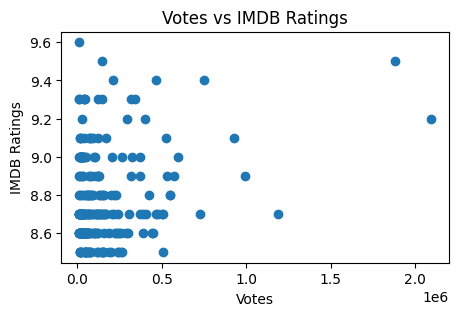

In [52]:
# Scatter Plot : Votes vs IMDB Ratings
plt.figure(figsize = (5, 3))
plt.scatter(df_cleaned['imbd_votes'], df_cleaned['imbd_rating'])
plt.title('Votes vs IMDB Ratings')
plt.xlabel('Votes')
plt.ylabel('IMDB Ratings')
plt.show()

In [53]:
# No meaningful pattern can be extracted out of it

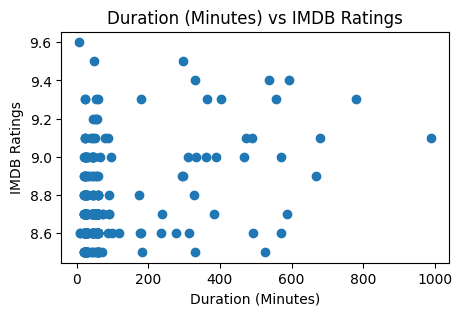

In [54]:
# Scatter Plot : imbd_rating vs duration (minutes)
plt.figure(figsize = (5, 3))
plt.scatter(df_cleaned['duration_minutes'], df_cleaned['imbd_rating'])
plt.title('Duration (Minutes) vs IMDB Ratings')
plt.xlabel('Duration (Minutes)')
plt.ylabel('IMDB Ratings')
plt.show()

In [55]:
# No meaningful pattern can be extracted out of it

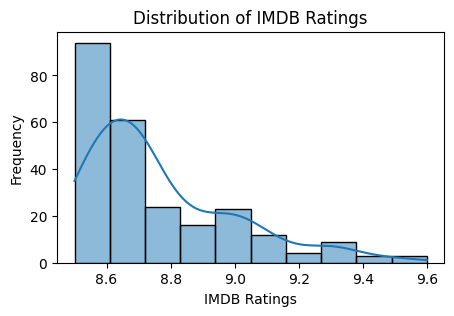

In [56]:
# Distribution Plot for imbd_ratings
plt.figure(figsize = (5, 3))
sns.histplot(df_cleaned['imbd_rating'], bins = 10, kde = True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Ratings')
plt.ylabel('Frequency')
plt.show()

In [57]:
# Majority of the movies are there till 8.6 rating and
# then count of movies is exponentially decreasing.

In [58]:
# Average IMDB Rating by Genre (Top 10 by frequency)
genre_columns = genre_dummies.columns
genre_counts = df_cleaned[genre_columns].sum().sort_values(ascending = False).head(10)
avg_ratings = {genre : df_cleaned[df_cleaned[genre] == 1]['imbd_rating'].mean() for genre in genre_counts.index}
print(avg_ratings)

{'Drama': np.float64(8.758823529411766), 'Comedy': np.float64(8.71264367816092), 'Action': np.float64(8.720370370370372), 'Adventure': np.float64(8.777358490566039), 'Crime': np.float64(8.73846153846154), 'Animation': np.float64(8.763461538461538), 'Documentary': np.float64(8.970370370370372), 'Mystery': np.float64(8.691666666666666), 'Thriller': np.float64(8.825), 'History': np.float64(8.946666666666665)}


/tmp/ipython-input-59-529732506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(avg_ratings.values()), y = list(avg_ratings.keys()), palette = 'viridis')


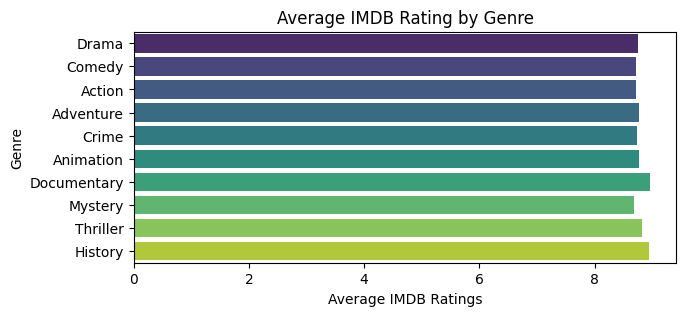

In [59]:
# Plot
plt.figure(figsize = (7, 3))
sns.barplot(x = list(avg_ratings.values()), y = list(avg_ratings.keys()), palette = 'viridis')
plt.title('Average IMDB Rating by Genre')
plt.xlabel('Average IMDB Ratings')
plt.ylabel('Genre')
plt.show()

In [60]:
# Feature Engineering

In [61]:
'''
Categorize the movies
1990 - 2000 : 1990s
2000 - 2010 : 2000s
2010 - 2020 : 2010s
2020 - 2025 : 2020s
2026 onwards : Other
'''

'\nCategorize the movies\n1990 - 2000 : 1990s\n2000 - 2010 : 2000s\n2010 - 2020 : 2010s\n2020 - 2025 : 2020s\n2026 onwards : Other\n'

In [62]:
# Creating the function
def categorize_year(year):
  if 1990 <= year <= 2000:
    return '1990s'
  elif 2000 <= year <= 2010:
    return '2000s'
  elif 2010 <= year <= 2020:
    return '2010s'
  elif 2020 <= year <= 2025:
    return '2020s'
  else:
    return 'Other'

In [63]:
# Creating a column with name 'year_range'
df_cleaned['year_range'] = df_cleaned['year'].apply(categorize_year)
df_cleaned.head()

,rank,show_id,year,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,year_range
0,1,tt5491994,2016,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",...,0,0,0,0,0,0,0,0,0,2010s
1,2,tt0903747,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...",...,0,0,0,0,0,0,1,0,0,2000s
2,3,tt0795176,2006,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield",...,0,0,0,0,0,0,0,0,0,2000s
3,4,tt0185906,2001,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...",...,0,0,0,0,0,0,0,1,0,2000s
4,5,tt7366338,2019,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,...,0,0,0,0,0,0,1,0,0,2010s


In [64]:
# One Hot Encode the "year_range"
year_range_dummies = pd.get_dummies(df_cleaned['year_range'], prefix = 'year')
year_range_dummies = year_range_dummies.replace({False : 0, True : 1})
df_cleaned = pd.concat([df_cleaned, year_range_dummies], axis = 1)
df_cleaned.head()

/tmp/ipython-input-64-734482606.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  year_range_dummies = year_range_dummies.replace({False : 0, True : 1})


,rank,show_id,year,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,...,Talk-Show,Thriller,War,Western,year_range,year_1990s,year_2000s,year_2010s,year_2020s,year_Other
0,1,tt5491994,2016,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",...,0,0,0,0,2010s,0,0,1,0,0
1,2,tt0903747,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...",...,0,1,0,0,2000s,0,1,0,0,0
2,3,tt0795176,2006,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield",...,0,0,0,0,2000s,0,1,0,0,0
3,4,tt0185906,2001,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...",...,0,0,1,0,2000s,0,1,0,0,0
4,5,tt7366338,2019,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,...,0,1,0,0,2010s,0,0,1,0,0


In [65]:
# Dropping irrelevant features from the data
df_cleaned = df_cleaned.drop(columns = ['year', 'year_range'])
df_cleaned.head()

,rank,show_id,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,writer_id,...,Sport,Talk-Show,Thriller,War,Western,year_1990s,year_2000s,year_2010s,year_2020s,year_Other
0,1,tt5491994,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",nm2357454,...,0,0,0,0,0,0,0,1,0,0
1,2,tt0903747,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...","nm0319213,nm0332467,nm2297407,nm1028558,nm0909...",...,0,0,1,0,0,0,1,0,0,0
2,3,tt0795176,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield","nm0041003,nm1761192,nm0288144,nm0662263",...,0,0,0,0,0,0,1,0,0,0
3,4,tt0185906,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...","nm0024421,nm0096897,nm0296861,nm0000158,nm0420...",...,0,0,0,1,0,0,1,0,0,0
4,5,tt7366338,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,nm0563301,...,0,0,1,0,0,0,0,1,0,0


In [66]:
# Importing important libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting and Scaling
X = df_cleaned.drop(columns = ['imbd_rating'])
y = df_cleaned['imbd_rating']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [67]:
# Normalize numeric features
scaler = StandardScaler()
numeric_cols = ['imbd_votes', 'duration_minutes', 'rank']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [68]:
# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dropping non-numeric columns
X_train = X_train.select_dtypes(include = ['number'])
X_test = X_test.select_dtypes(include = ['number'])

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

# Training the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Taking predictions from the model on testing data
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

In [69]:
# Importing important libraries
from sklearn.metrics import mean_squared_error, r2_score

# Compute Metrics
def evaluate_model(y_true, y_pred, model_name):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  return {
      'Model' : model_name,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2 Score' : r2
  }

In [70]:
# Evaluate the models
results = [
    evaluate_model(y_test, lr_pred, 'Linear Regression'),
    evaluate_model(y_test, rf_pred, 'Random Forest'),
    evaluate_model(y_test, gb_pred, 'Gradient Boosting')
]

results_df = pd.DataFrame(results)
results_df.head()

,Model,MSE,RMSE,R2 Score
0,Linear Regression,0.028223,0.167997,0.535804
1,Random Forest,0.021561,0.146836,0.645381
2,Gradient Boosting,0.018081,0.134467,0.702607


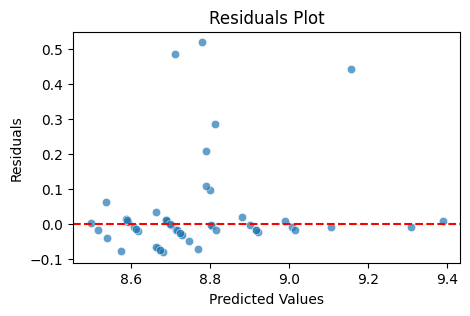

In [71]:
# Residuals plot for best model (e.g, Gradient Boosting Regressor)
residuals = y_test - gb_pred
plt.figure(figsize = (5, 3))
sns.scatterplot(x = gb_pred, y = residuals, alpha = 0.7)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [72]:
# Importing important libraries'
from sklearn.model_selection import GridSearchCV

# Parameters Grid
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1]
}

# Initializing Grid Search
grid_search = GridSearchCV(estimator = GradientBoostingRegressor(),
                           param_grid = param_grid, cv = 5,
                           scoring = 'r2', n_jobs = -1)

# Fitting the data
grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [73]:
# Creating the optimal model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print('Best Parameters :', grid_search.best_params_)
print('R2 Score :', np.round(r2_score(y_test, y_pred_best), 3))

Best Parameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
R2 Score : 0.706


In [74]:
# Model Interpretation
# Extract the feature importances
feature_importances = pd.Series(best_model.feature_importances_, index = X_train.columns)
top_features = feature_importances.sort_values(ascending = False).head(10)
print(top_features)

rank                0.872405
imbd_votes          0.083490
Family              0.010789
duration_minutes    0.008846
Fantasy             0.007669
year_2010s          0.003175
Documentary         0.001959
Thriller            0.001640
year_2020s          0.001047
year_1990s          0.001004
dtype: float64


/tmp/ipython-input-75-1042644476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_features.values, y = top_features.index, palette = 'viridis')


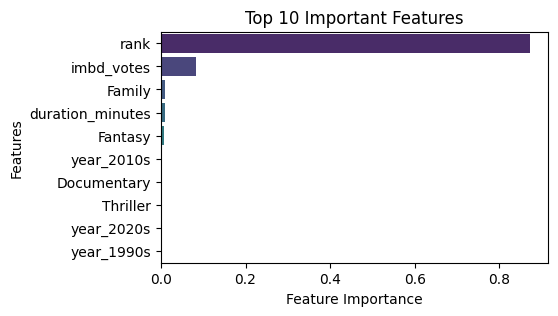

In [75]:
# Plot the top 10 important features
plt.figure(figsize = (5, 3))
sns.barplot(x = top_features.values, y = top_features.index, palette = 'viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [27]:

# Convert categorical features (Genre) into numerical features using one-hot encoding
data = pd.get_dummies(data, columns=['Genre'], drop_first=True)

KeyError: "None of [Index(['Genre'], dtype='object')] are in the [columns]"

In [ ]:
# Handle missing values (if any) by filling with the mean or dropping rows
data.fillna(data.mean(), inplace=True)

In [ ]:
# Correlation between features and target variable
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [28]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

data['cleaned_review'] = data['review'].apply(preprocess_text)

display(data[['review', 'cleaned_review']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# You might want to adjust parameters like max_features, min_df, max_df, ngram_range based on your data
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting to top 5000 features for demonstration

# Fit and transform the cleaned reviews
X = tfidf_vectorizer.fit_transform(data['cleaned_review'])

# Display the shape of the resulting feature matrix
print("Shape of TF-IDF feature matrix:", X.shape)

Shape of TF-IDF feature matrix: (50000, 5000)


In [31]:
# The code in this cell was attempting operations on a 'Genre' column which is not in the current dataset.
# Since we have already preprocessed the text data and performed TF-IDF feature extraction,
# this code is not relevant to the next steps of the project.

# The original code was:
# # Convert categorical features (Genre) into numerical features using one-hot encoding
# data = pd.get_dummies(data, columns=['Genre'], drop_first=True)

# # Handle missing values (if any) by filling with the mean or dropping rows
# data.fillna(data.mean(), inplace=True)

# # Correlation between features and target variable
# correlation_matrix = data.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
# plt.show()